###Import the stuff

In [5]:
import sys

In [6]:
sys.path.append("C:\Users\Miguel\workspace\Thesis\geobyes")

In [7]:
import geobayes_simple as gs
from matplotlib import pyplot as plt


In [8]:
%matplotlib inline
import pymc as pm
from pymc.Matplot import plot
import numpy as np
import daft
from IPython.core.pylabtools import figsize
figsize(12.5, 10)

Couldn't import dot_parser, loading of dot files will not be possible.


##### Normal distributions

A Normal random variable, denoted $X \sim N(\mu, 1/\tau)$, has a distribution with two parameters: the mean, $\mu$, and the *precision*, $\tau$. Those familiar with the Normal distribution already have probably seen $\sigma^2$ instead of $\tau^{-1}$. They are in fact reciprocals of each other. The change was motivated by simpler mathematical analysis and is an artifact of older Bayesian methods. Just remember: the smaller $\tau$, the larger the spread of the distribution (i.e. we are more uncertain); the larger $\tau$, the tighter the distribution (i.e. we are more certain). Regardless, $\tau$ is always positive. 

The probability density function of a $N( \mu, 1/\tau)$ random variable is:

$$ f(x | \mu, \tau) = \sqrt{\frac{\tau}{2\pi}} \exp\left( -\frac{\tau}{2} (x-\mu)^2 \right) $$


The conversion deviation precision is somehow -> 1.0 / data_std[0] ** 2)

### Simplest case: three horizontal layers, with depth unknow
####Setting priors



In [29]:
alpha = pm.Normal("alpha", 0, 0.5, value= 5)
beta = pm.Normal("beta", -200, 0.005, value=0)
gamma = pm.Normal("gamma", -300, 0.005, value = 0)


#MODEL!!
model = pm.Model([alpha, beta, gamma])

####Pymc simulation

In [30]:
M = pm.MCMC(model)
M.sample(iter=1000, burn = 800)


 [-----------------100%-----------------] 1000 of 1000 complete in 0.1 sec

In [31]:
gamma.logp

-3.602161017819371

In [32]:
alpha_samples = M.trace('alpha')[:]
beta_samples = M.trace('beta')[:]
gamma_samples = M.trace('gamma')[:]

alpha_samples, alpha_samples_all = M.trace('alpha')[-80:], M.trace("alpha")[:]
beta_samples, beta_samples_all = M.trace('beta')[-80:], M.trace("beta")[:]
gamma_samples, gamma_samples_all = M.trace('gamma')[-80:], M.trace('gamma')[:]

parameters = zip(alpha_samples, beta_samples, gamma_samples)
parameters_all = zip(alpha_samples_all, beta_samples_all, gamma_samples_all)

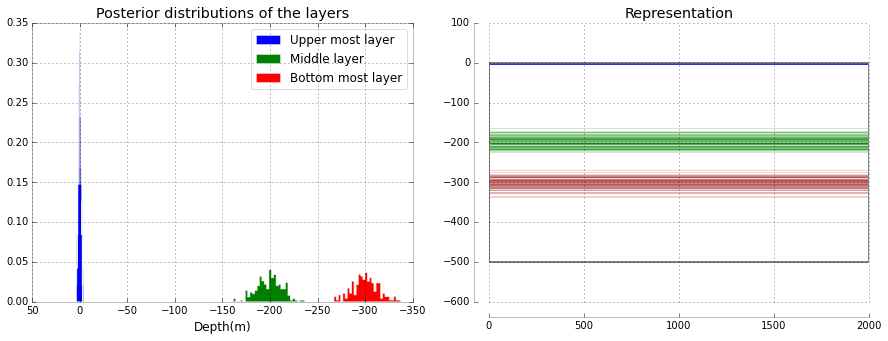

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(alpha_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Upper most layer", normed=True, color = "b")
ax[0].hist(beta_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Middle layer", normed=True, color = "g")
ax[0].hist(gamma_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Bottom most layer", normed=True, color = "r")


ax[0].invert_xaxis()
ax[0].legend()
ax[0].set_title(r"""Posterior distributions of the layers""")
ax[0].set_xlabel("Depth(m)")


ax[1].set_title("Representation")
ax[1].set_xlim([0,2000])
for alpha, beta, gamma in parameters:
    #print alpha, beta, gamma
    model_parameters = {'faults' : {'fault_w_pos' : (0,0.),
                                    'fault_w_dip' : 0,
                                    'fault_e_pos' : (0.,0.),
                                    'fault_e_dip' : 0.},
                        'layers' : {3 : {'w' :(250., -200.),
                                         
                                                 'c' : (1000., -400.),
                                                 'e' : (1750., alpha)},
                                    2 : {'w' :(250., -400.),
                                                 'c' : (1000., -600.),
                                                 'e' : (1750., beta)},
                                    1 : {'w' :(250., -600.),
                                                 'c' : (1000., -800.),
                                                 'e' : (1750., gamma)}},
                        'layer_dip' : 0.000001,
                        'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                        'width' : 2000., # [m]
                        'height' : 500. # [m]
                        }
    GM = gs.GrabenModel(model_parameters)
    GM.plot_model(ax = ax[1], plot_faults= False, plot_points= False, alpha = 0.3) # Need to make it transparent!!!

Plotting beta
Plotting gamma
Plotting alpha


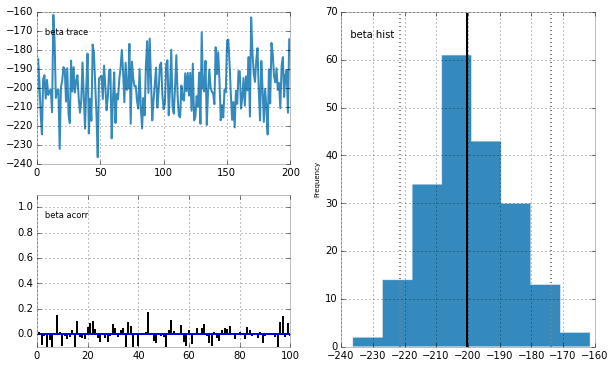

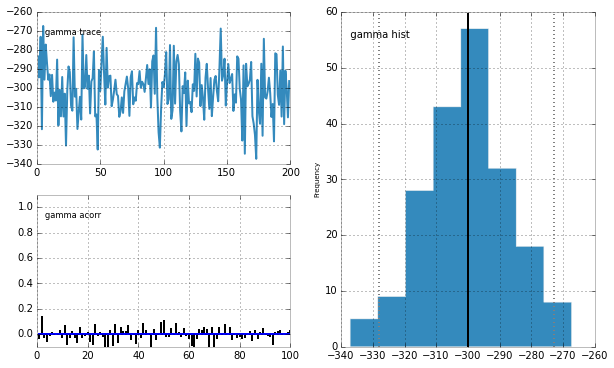

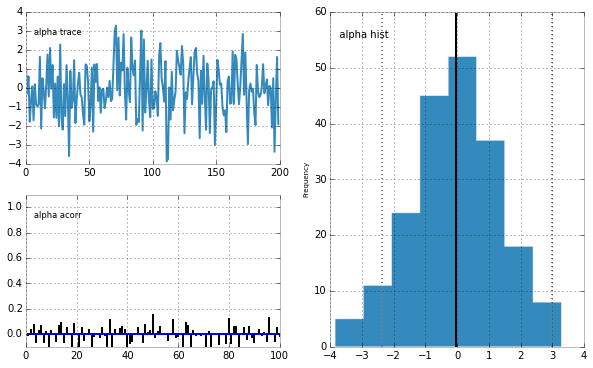

In [34]:
plot(M)

Could not calculate Gelman-Rubin statistics. Requires multiple chains of equal length.


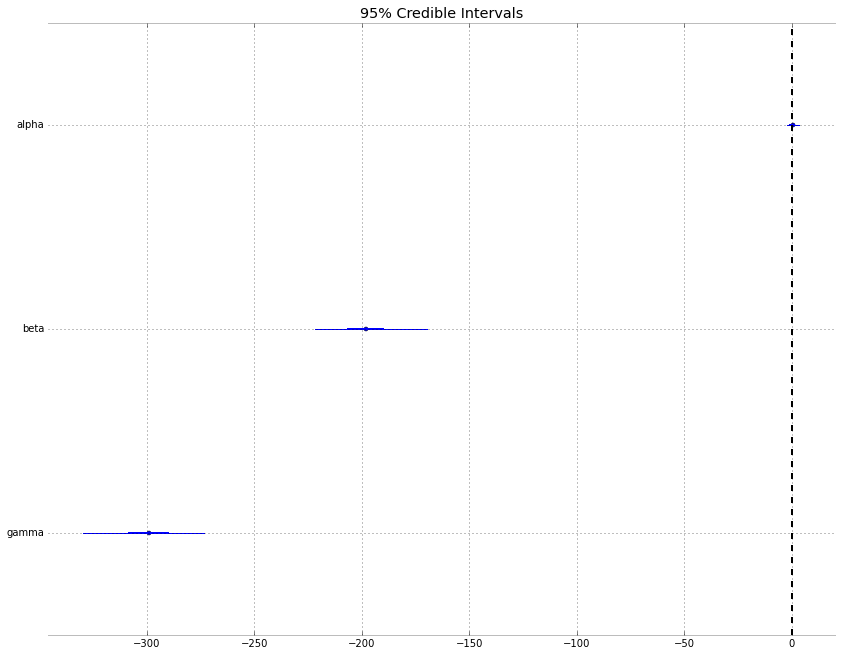

In [26]:
pm.Matplot.summary_plot([alpha, beta, gamma])

In [36]:
M.summary()


beta:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	[[-199.482]]     [[ 13.154]]      [[ 0.85]]    [-221.3   -173.977]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	[[-223.855]]     [[-208.265]]    [[-200.403]]   [[-190.162]]  [[-174.363]]
	

gamma:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	[[-300.179]]     [[ 13.451]]      [[ 0.932]]   [-328.011 -273.006]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	[[-328.011]]     [[-308.659]]    [[-300.147]]   [[-291.759]]  [[-273.006]]
	

alpha:
 
	Mean             SD               MC Error        95% HPD interval
	--------

###Tickness of layers known
####Setting priors

Using value or no value in the thickness depends on the level of uncertainty we have of the thickness. Using value we are setting the uncertainty in one depth. When we do not use it, the depth can be inside all the range of uncertainty what in my opinion lead us to a wrong value since it is random where
#### Model without value:

In [43]:

mu_alpha = 0
tau_alpha = 0.5

alpha = pm.Normal("alpha", mu_alpha, tau_alpha)

mu_layer1 = 200
tau_layer1 = 0.05

mu_layer2 = 100
tau_layer2 = 0.005

@pm.stochastic
def beta(value = 200 , 
    
    return pm.Normal("beta", mu_beta, tau_beta)

print beta.value

model = pm.Model([alpha,beta])


200.0


In [44]:
M = pm.MCMC(model)
M.sample(iter=10000, burn = 80)
#M.summary()

 [-----------------100%-----------------] 10000 of 10000 complete in 3.9 sec

Plotting alpha
Plotting beta


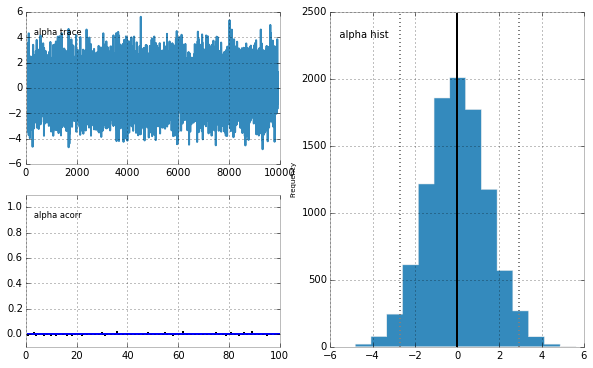

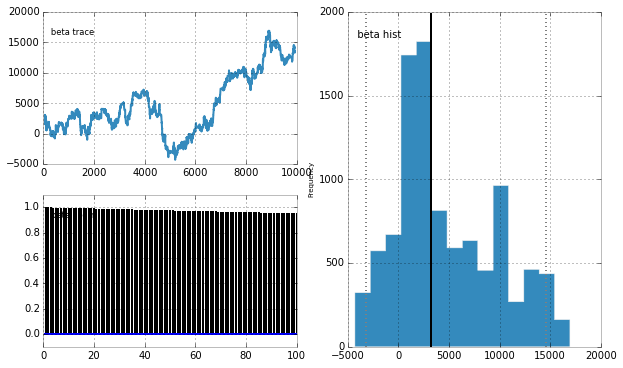

In [45]:
plot(M)

In [42]:
M.summary()


beta:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	[[ 1101.345]]    [[ 715.656]]     [[ 70.327]][ -260.233  2385.114]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	[[-474.602]]     [[ 600.436]]    [[ 1225.938]]  [[ 1670.711]] [[ 2217.127]]
	

alpha:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	[[ 0.004]]       [[ 1.414]]       [[ 0.008]]       [-2.735  2.795]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	[[-2.772]]       [[-0.945]]      [[ 0.007]]     [[ 0.947]]    [[ 2.762]]
	


In [46]:
alpha = pm.Normal("alpha", 0, 0.5)


thickness_layer1 = pm.Normal("thickness_layer1", 200, 0.5)
thickness_layer2 = pm.Normal("thickness_layer2", 100, 0.005)

lala = alpha-thickness_layer1

#beta = pm.Normal("beta", 200, 1)
@pm.deterministic
def beta(alpha = alpha, thickness_layer1 = thickness_layer1):
    return pm.Normal("beta", 200, 0.5)
#beta2 = alpha + thickness_layer1 

@pm.deterministic
def gamma(beta = alpha, thickness_layer2 = thickness_layer1):
    return beta - thickness_layer2
teta = alpha - thickness_layer1 

#MODEL!!
model = pm.Model([alpha, beta, gamma, thickness_layer1])

print lala.value

#print gamma.value

-198.081105419


####PyMC simulation

In [47]:
M = pm.MCMC(model)
M.sample(iter=500, burn = 80)

 [-----------------100%-----------------] 500 of 500 complete in 0.3 sec

In [ ]:
plot(M)

Plotting thickness_layer1
Plotting alpha
Plotting

In [18]:
M.summary()


gamma:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	[[-200.523]]     [[ 1.466]]       [[ 0.074]]   [-203.505 -198.003]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	[[-203.33]]      [[-201.592]]    [[-200.634]]   [[-199.58]]   [[-197.477]]
	

beta:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	[[ 199.971]]     [[ 1.451]]       [[ 0.073]]   [ 196.949  202.636]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	[[ 197.063]]     [[ 198.999]]    [[ 199.953]]   [[ 200.825]]  [[ 202.951]]
	

alpha:
 
	Mean             SD               MC Error        95% HPD interval
	--------

In [40]:
alpha_samples = M.trace('alpha')[:]
beta_samples = M.trace('beta')[:]
gamma_samples = M.trace('gamma')[:]

alpha_samples, alpha_samples_all = M.trace('alpha')[-80:], M.trace("alpha")[:]
beta_samples, beta_samples_all = M.trace('beta')[-80:], M.trace("beta")[:]
gamma_samples, gamma_samples_all = M.trace('gamma')[-80:], M.trace('gamma')[:]

parameters = zip(alpha_samples, beta_samples, gamma_samples)
parameters_all = zip(alpha_samples_all, beta_samples_all, gamma_samples_all)

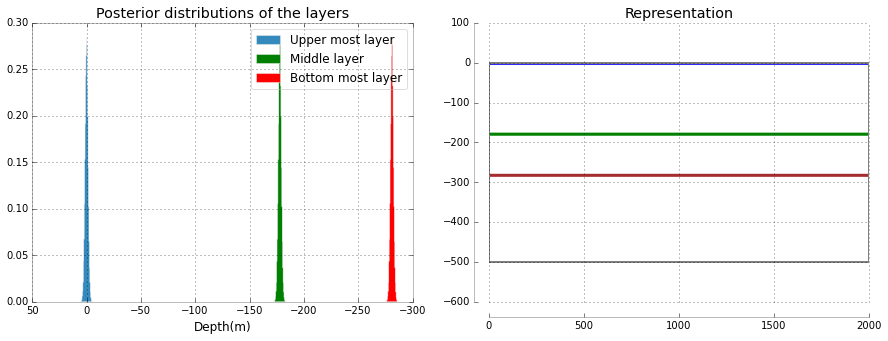

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(alpha_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Upper most layer", normed=True)
ax[0].hist(beta_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Middle layer", normed=True, color = "g")
ax[0].hist(gamma_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Bottom most layer", normed=True, color = "r")


ax[0].invert_xaxis()
ax[0].legend()
ax[0].set_title(r"""Posterior distributions of the layers""")
ax[0].set_xlabel("Depth(m)")


ax[1].set_title("Representation")
ax[1].set_xlim([0,2000])
for alpha, beta, gamma in parameters:
    #print alpha, beta, gamma
    model_parameters = {'faults' : {'fault_w_pos' : (0,0.),
                                    'fault_w_dip' : 0,
                                    'fault_e_pos' : (0.,0.),
                                    'fault_e_dip' : 0.},
                        'layers' : {3 : {'w' :(250., -200.),
                                         
                                                 'c' : (1000., -400.),
                                                 'e' : (1750., alpha)},
                                    2 : {'w' :(250., -400.),
                                                 'c' : (1000., -600.),
                                                 'e' : (1750., beta)},
                                    1 : {'w' :(250., -600.),
                                                 'c' : (1000., -800.),
                                                 'e' : (1750., gamma)}},
                        'layer_dip' : 0.000001,
                        'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                        'width' : 2000., # [m]
                        'height' : 500. # [m]
                        }
    GM = gs.GrabenModel(model_parameters)
    GM.plot_model(ax = ax[1], plot_faults= False, plot_points= False, alpha = 0.3) # Need to make it transparent!!!

#### With value

In [15]:
alpha = pm.Normal("alpha", 0, 0.5)

thickness_layer1 = pm.Normal("thickness_layer1", 200, 0.005, value = 200)
thickness_layer2 = pm.Normal("thickness_layer2", 100, 0.005, value = 100)

@pm.deterministic
def beta(alpha = alpha, thickness_layer1 = thickness_layer1):
    return alpha - 200


@pm.deterministic
def gamma(beta = beta, thickness_layer2 = thickness_layer2):
    return beta - 100


#MODEL!!
model = pm.Model([alpha, beta,gamma])

print beta.value
print gamma.value

-200.615329234
-300.615329234


In [16]:
M = pm.MCMC(model)
M.sample(iter=50000, burn = 8000)

 [-----------------100%-----------------] 50000 of 50000 complete in 3.2 sec

In [69]:
alpha_samples = M.trace('alpha')[:]
beta_samples = M.trace('beta')[:]
gamma_samples = M.trace('gamma')[:]

alpha_samples, alpha_samples_all = M.trace('alpha')[-80:], M.trace("alpha")[:]
beta_samples, beta_samples_all = M.trace('beta')[-80:], M.trace("beta")[:]
gamma_samples, gamma_samples_all = M.trace('gamma')[-80:], M.trace('gamma')[:]

parameters = zip(alpha_samples, beta_samples, gamma_samples)
parameters_all = zip(alpha_samples_all, beta_samples_all, gamma_samples_all)

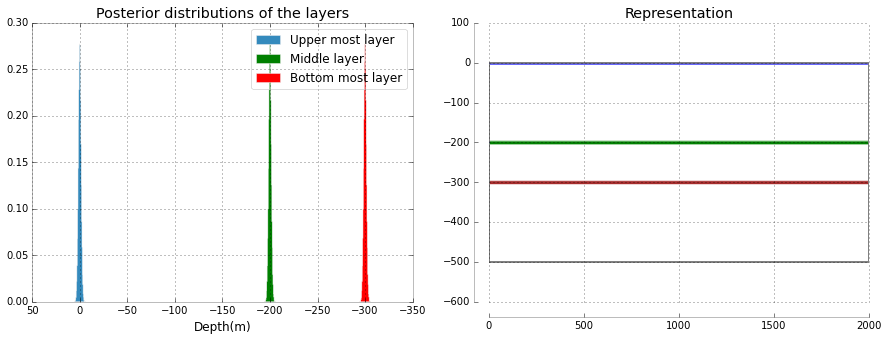

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(alpha_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Upper most layer", normed=True)
ax[0].hist(beta_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Middle layer", normed=True, color = "g")
ax[0].hist(gamma_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Bottom most layer", normed=True, color = "r")


ax[0].invert_xaxis()
ax[0].legend()
ax[0].set_title(r"""Posterior distributions of the layers""")
ax[0].set_xlabel("Depth(m)")


ax[1].set_title("Representation")
ax[1].set_xlim([0,2000])
for alpha, beta, gamma in parameters:
    #print alpha, beta, gamma
    model_parameters = {'faults' : {'fault_w_pos' : (0,0.),
                                    'fault_w_dip' : 0,
                                    'fault_e_pos' : (0.,0.),
                                    'fault_e_dip' : 0.},
                        'layers' : {3 : {'w' :(250., -200.),
                                         
                                                 'c' : (1000., -400.),
                                                 'e' : (1750., alpha)},
                                    2 : {'w' :(250., -400.),
                                                 'c' : (1000., -600.),
                                                 'e' : (1750., beta)},
                                    1 : {'w' :(250., -600.),
                                                 'c' : (1000., -800.),
                                                 'e' : (1750., gamma)}},
                        'layer_dip' : 0.000001,
                        'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                        'width' : 2000., # [m]
                        'height' : 500. # [m]
                        }
    GM = gs.GrabenModel(model_parameters)
    GM.plot_model(ax = ax[1], plot_faults= False, plot_points= False, alpha = 0.3) # Need to make it transparent!!!

Could not calculate Gelman-Rubin statistics. Requires multiple chains of equal length.


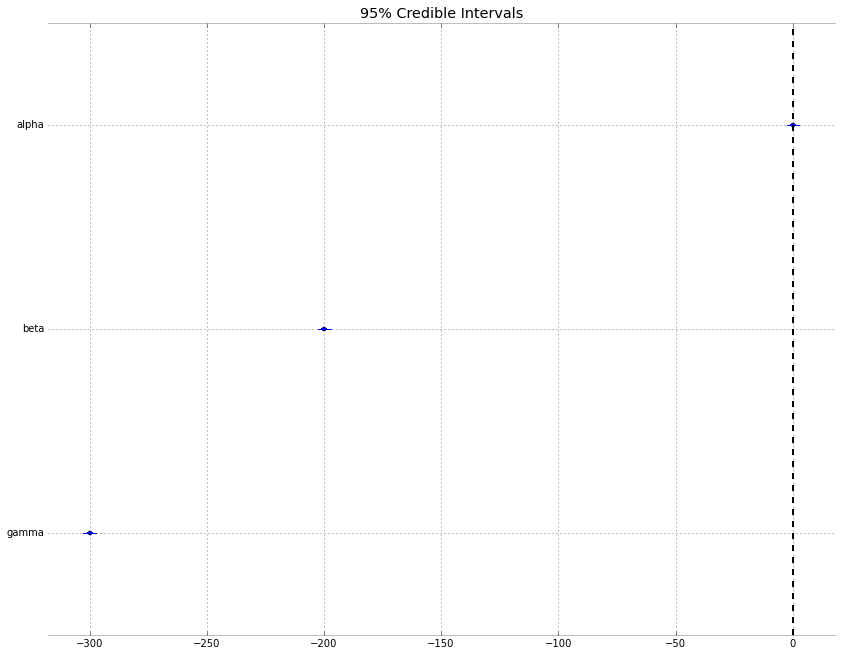

In [19]:
pm.Matplot.summary_plot([alpha, beta, gamma])

## I have to try to find the MAP too

#### Adding complexity: Faults and slight inclination

In [19]:
alpha = pm.Normal("alpha", 0, 0.5)

thickness_layer1 = pm.Normal("thickness_layer1", 200, 0.005)
thickness_layer2 = pm.Normal("thickness_layer2", 100, 0.005)



offset = pm.Normal("offset", 400, 0.05)
layer_dip = pm.Normal("layer_dip", 5, 0.05)

fault_e_dip = pm.Normal("fault_e_dip", -70, 0.0005)
fault_w_dip = pm.Normal("fault_w_dip", 70, 0.0005)


@pm.deterministic
def beta(alpha = alpha, thickness_layer1 = thickness_layer1):
    return alpha - thickness_layer1


@pm.deterministic
def gamma(beta = beta, thickness_layer2 = thickness_layer2):
    return beta - thickness_layer2


#MODEL!!
model = pm.Model([alpha, beta, gamma, thickness_layer1, thickness_layer2, offset, layer_dip, fault_e_dip, fault_w_dip])

In [20]:
M = pm.MCMC(model)
M.sample(iter=5000, burn = 800)

 [-----------------100%-----------------] 5000 of 5000 complete in 1.0 sec

In [21]:
gamma_samples, gamma_samples_all = M.trace('gamma')[-9:], M.trace('gamma')[:]
alpha_samples, alpha_samples_all = M.trace('alpha')[-9:], M.trace("alpha")[:]
beta_samples, beta_samples_all = M.trace('beta')[-9:], M.trace("beta")[:]
offset_samples, offset_samples_all = M.trace("offset")[-9:], M.trace("offset")[:]
layer_dip = M.trace("layer_dip")[-9:]
fault_e_dip = M.trace("fault_e_dip")[-9:]
fault_w_dip = M.trace("fault_w_dip")[-9:]

parameters = zip(alpha_samples, beta_samples, gamma_samples, offset_samples, layer_dip, fault_e_dip, fault_w_dip)
parameters_all = zip(alpha_samples_all, beta_samples_all, gamma_samples_all, offset_samples_all)

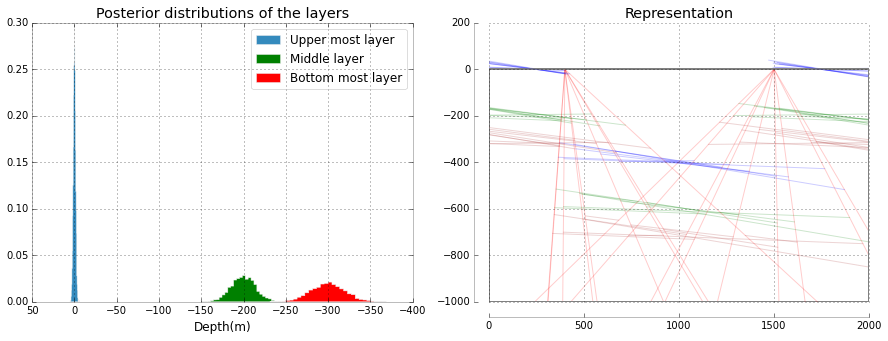

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(alpha_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Upper most layer", normed=True)
ax[0].hist(beta_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Middle layer", normed=True, color = "g")
ax[0].hist(gamma_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Bottom most layer", normed=True, color = "r")


ax[0].invert_xaxis()
ax[0].legend()
ax[0].set_title(r"""Posterior distributions of the layers""")
ax[0].set_xlabel("Depth(m)")


ax[1].set_title("Representation")
ax[1].set_xlim([0,2000])
for  alpha, beta, gamma, offset, layer_dip, fault_e_dip, fault_w_dip in parameters:
    #print alpha, beta, gamma
    model_parameters = {'faults' : {'fault_w_pos' : (400.,0.),
                                'fault_w_dip' : fault_w_dip,
                                'fault_e_pos' : (1500.,0.),
                                'fault_e_dip' : fault_e_dip},
                        'layers' : {3 : {'w' :(250., alpha),
                                                 'c' : (1000., alpha - offset),
                                                 'e' : (1750., alpha)},
                                    2 : {'w' :(250., beta),
                                                 'c' : (1000., beta-offset),
                                                 'e' : (1750., beta)},
                                    1 : {'w' :(250., gamma),
                                                 'c' : (1000., gamma - offset),
                                                 'e' : (1750., gamma)}},
                        'layer_dip' : layer_dip,
                        'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                        'width' : 2000., # [m]
                        'height' : 1000. # [m]
                        }
    GM = gs.GrabenModel(model_parameters)
    GM.plot_model(ax = ax[1], plot_faults= True , plot_points= False, alpha = 0.3) # Need to make it transparent!!!
    
    
    

In [30]:
def plot_figure(alpha, beta, gamma, offset, layer_dip, fault_e_dip, fault_w_dip, axe_position):
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    
    model_parameters = {'faults' : {'fault_w_pos' : (400.,0.),
                                'fault_w_dip' : fault_w_dip,
                                'fault_e_pos' : (1500.,0.),
                                'fault_e_dip' : fault_e_dip},
                        'layers' : {3 : {'w' :(250., alpha),
                                                 'c' : (1000., alpha - offset),
                                                 'e' : (1750., alpha)},
                                    2 : {'w' :(250., beta),
                                                 'c' : (1000., beta-offset),
                                                 'e' : (1750., beta)},
                                    1 : {'w' :(250., gamma),
                                                 'c' : (1000., gamma - offset),
                                                 'e' : (1750., gamma)}},
                        'layer_dip' : layer_dip,
                        'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                        'width' : 2000., # [m]
                        'height' : 1000. # [m]
                        }
    GM = gs.GrabenModel(model_parameters)
    GM.plot_model(ax = axe_position, plot_faults= True, plot_points= False, alpha = 1) # Need to make it transparent!!! 
    

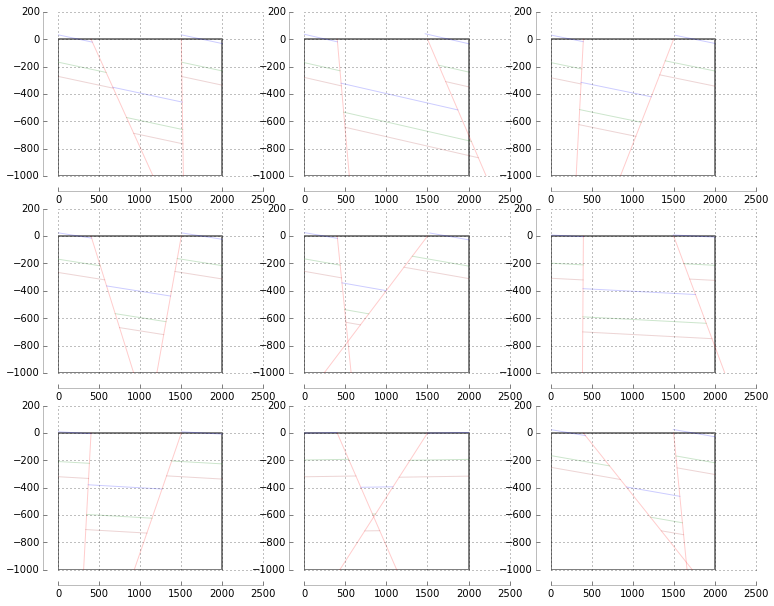

In [33]:
i = 0
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
for alpha, beta, gamma, offset, layer_dip, fault_e_dip, fault_w_dip  in parameters:
   # ax = fig.add_subplot(111)
    plot_figure(alpha, beta, gamma, offset, layer_dip, fault_e_dip, fault_w_dip, axs[i- 3*(i/3),i/3])
    i += 1

Plotting beta
Plotting layer_dip
Plotting gamma
Plotting offset
Plotting thickness_layer2
Plotting thickness_layer1
Plotting alpha
Plotting fault_e_dip
Plotting fault_w_dip


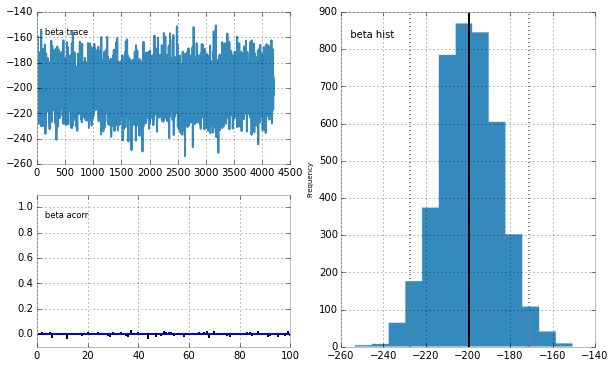

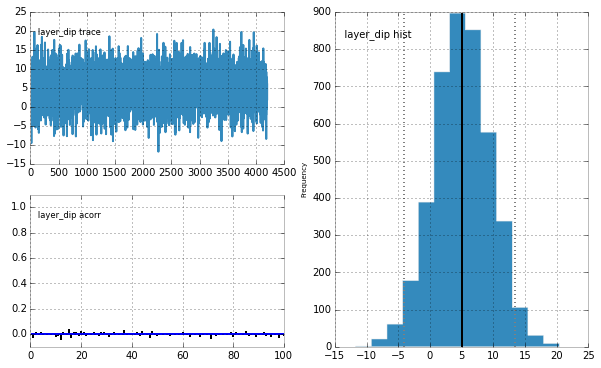

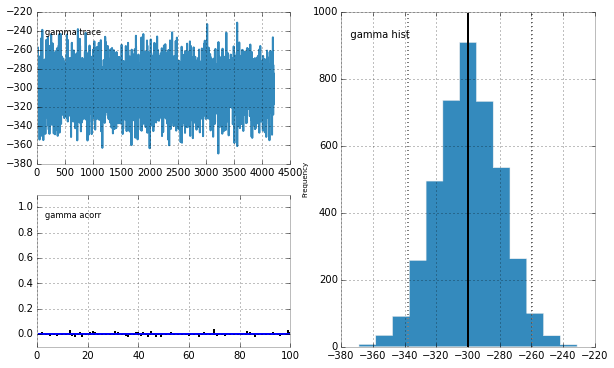

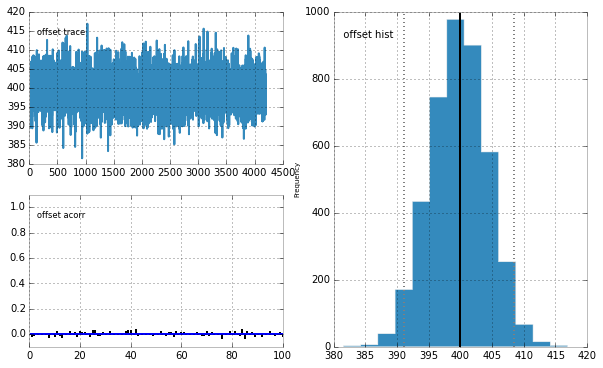

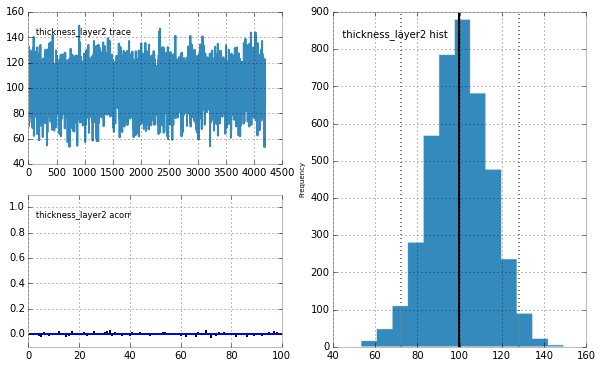

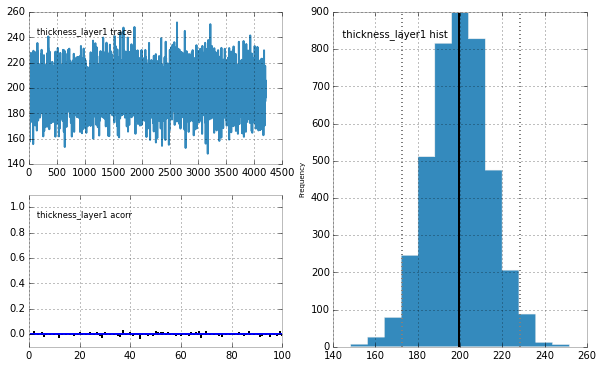

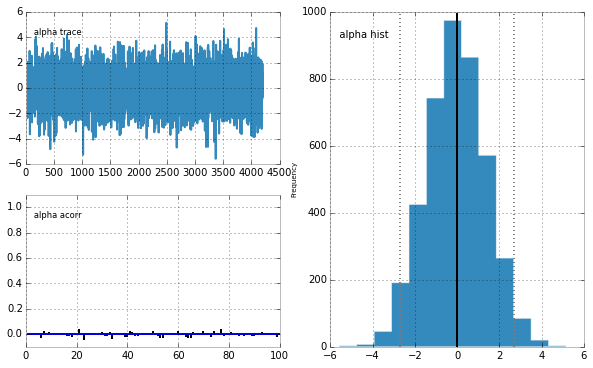

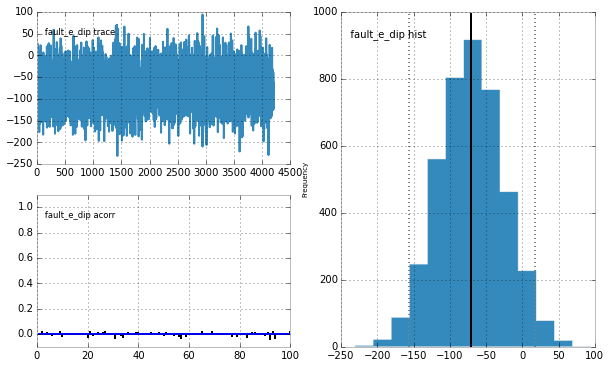

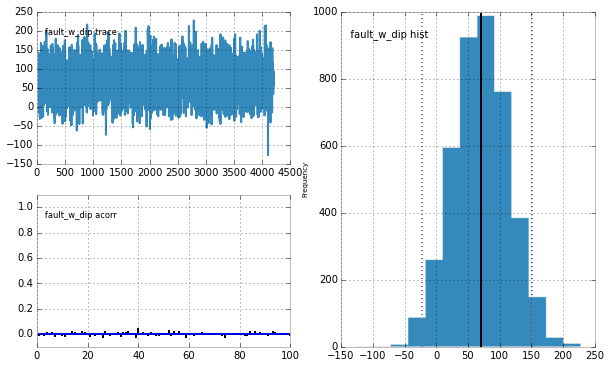

In [23]:
plot(M)